<a href="https://colab.research.google.com/github/JinkyoHan/NAS-SR/blob/main/FEYN_010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install feyn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.8 MB/s eta 0:00:00


Epoch no. 1/500 - Tried 881 models - Elapsed: 3s of 31.5m. (est.)
Epoch no. 2/500 - Tried 1983 models - Elapsed: 11s of 47.0m. (est.)
Epoch no. 3/500 - Tried 3056 models - Elapsed: 22s of 1.0h. (est.)
Epoch no. 4/500 - Tried 4086 models - Elapsed: 34s of 1.2h. (est.)
Epoch no. 5/500 - Tried 5113 models - Elapsed: 48s of 1.3h. (est.)
Epoch no. 6/500 - Tried 6109 models - Elapsed: 1m 3s of 1.4h. (est.)
Epoch no. 7/500 - Tried 7100 models - Elapsed: 1m 17s of 1.5h. (est.)
Epoch no. 8/500 - Tried 8056 models - Elapsed: 1m 32s of 1.6h. (est.)
Epoch no. 9/500 - Tried 9024 models - Elapsed: 1m 46s of 1.6h. (est.)
Epoch no. 10/500 - Tried 10000 models - Elapsed: 2m 1s of 1.7h. (est.)
Epoch no. 11/500 - Tried 10924 models - Elapsed: 2m 15s of 1.7h. (est.)
Epoch no. 12/500 - Tried 11879 models - Elapsed: 2m 30s of 1.7h. (est.)
Epoch no. 13/500 - Tried 12810 models - Elapsed: 2m 45s of 1.8h. (est.)
Epoch no. 14/500 - Tried 13706 models - Elapsed: 2m 59s of 1.8h. (est.)
Epoch no. 15/500 - Tried 14

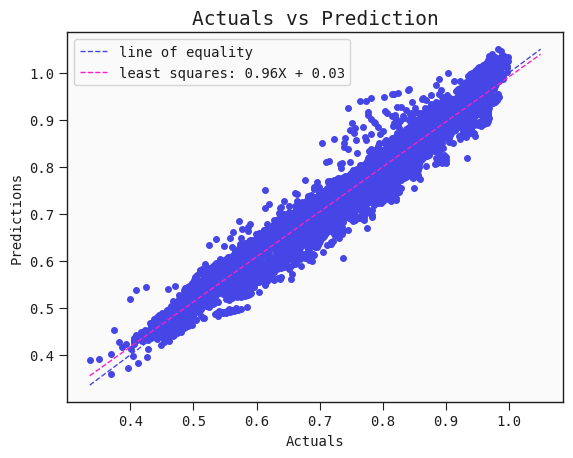

In [11]:
import pandas as pd
import feyn
from feyn.tools import split


# Excel 파일에서 데이터 읽기
file_path = 'Tbar_Flatbar.xlsx'  # 여기에 실제 파일 경로를 입력하세요
sheet_name = 'Sheet1'  # 원하는 시트 이름을 입력하세요. 'Sheet1'은 기본값입니다.
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 분리 (훈련용 / 테스트용)
train, test = split(df, ratio=(0.8, 0.2), random_state=42)

# QLattice 연결
ql = feyn.QLattice()

# 여기서는 'TARGET'이라는 이름의 열이 종속 변수로 사용된다고 가정하였습니다.
# 실제 데이터셋의 종속 변수 이름에 맞게 변경해야 합니다.
models = ql.auto_run(train, output_name="ULS_YS", kind='regression',n_epochs=500)


# 가장 성능이 좋은 모델 선택
best_model = models[0]

# 모델 출력
print(best_model)

# 모델의 그래픽 표현
best_model.plot_regression(data=train)


In [64]:
from feyn.plots import Theme
Theme.set_theme('dark')

In [42]:
# Save a model to a file
models[0].save('my_model.json')

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="368.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 875 368.0" width="875" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="275.0" width="591" x="0" y="0"><defs /><rect class="node" fill="#0AB4FA" height="35" stroke="#FAFAFA" stroke-width="1" width="90" x="481" y="110.0"><title>ULS_YS
linear:
scale=0.331414
scale offset=0.000000
w=2.943305
bias=0.3397</title></rect><text fill="#FAFAFA" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="131.5">ULS_YS</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="119.0">0</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="119.0">out</text><line stroke="#FAFAFA" x1="451" x2="481" y1="127.5" y2="127.5" /><rect class="node" fill="#1E1E1E" height="35" stroke="#FF640A" stroke-width="1" width="90" x="361" y="110.0"><title>add</title></rect><text fill="#FAFAFA" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="131.5">add</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="119.0">1</text><line stroke="#FAFAFA" x1="331" x2="361" y1="97.5" y2="118.5" /><line stroke="#FAFAFA" x1="331" x2="361" y1="157.5" y2="136.5" /><rect class="node" fill="#1E1E1E" height="35" stroke="#FF640A" stroke-width="1" width="90" x="241" y="80.0"><title>gaussian</title></rect><text fill="#FAFAFA" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">gaussian</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">2</text><line stroke="#FAFAFA" x1="211" x2="241" y1="37.5" y2="88.5" /><line stroke="#FAFAFA" x1="211" x2="241" y1="97.5" y2="106.5" /><rect class="node" fill="#1E1E1E" height="35" stroke="#FF640A" stroke-width="1" width="90" x="121" y="20.0"><title>squared</title></rect><text fill="#FAFAFA" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">squared</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">3</text><line stroke="#FAFAFA" x1="91" x2="121" y1="67.5" y2="37.5" /><rect class="node" fill="#0AB4FA" height="35" stroke="#FAFAFA" stroke-width="1" width="90" x="1" y="50.0"><title>Lamb
linear:
scale=1.392068
scale offset=0.474278
w=1.005523
bias=-0.3989</title></rect><text fill="#FAFAFA" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="71.5">Lamb</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="59.0">4</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="59.0">num</text><rect class="node" fill="#0AB4FA" height="35" stroke="#FAFAFA" stroke-width="1" width="90" x="121" y="80.0"><title>As_A
linear:
scale=2.630352
scale offset=0.402846
w=0.302457
bias=-0.6057</title></rect><text fill="#FAFAFA" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="101.5">As_A</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="89.0">5</text><text fill="#FAFAFA" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="89.0">num</text><rect class="node" fill="#1E1E1E" height="35" stroke="#FF640A" stroke-width="1" width="90" x="241" y="140.0"><title>gaussian</title></rect><text fill="#FAFAFA" font-family="monospace" font-size="12" style="poin
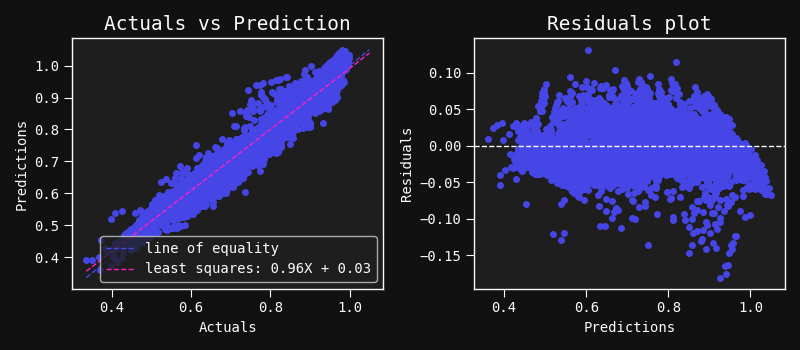
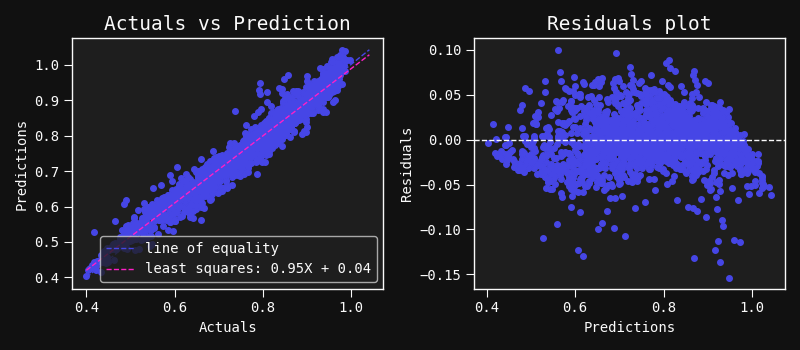

In [65]:
models[0].plot(
    data=train,
    compare_data=test
)

In [61]:
sympy_model = models[0].sympify(signif=5)

print(sympy_model)

sympy_model.as_expr()


0.97545*exp(-1.7158*(0.85893*AsA - 1)**2 - 7.6778*(Lamb - 0.75927)**4) + 0.97545*exp(-0.25234*(0.64783*Beta + 1)**2 - 2.0*exp(-448590.0*(-IszIz - 0.0012029)**2 - 3.6913*(0.90097*Lamb - 1)**2)) + 0.1126


0.97545*exp(-1.7158*(0.85893*AsA - 1)**2 - 7.6778*(Lamb - 0.75927)**4) + 0.97545*exp(-0.25234*(0.64783*Beta + 1)**2 - 2.0*exp(-448590.0*(-IszIz - 0.0012029)**2 - 3.6913*(0.90097*Lamb - 1)**2)) + 0.1126